In [55]:
import sys
sys.path.append('..')
from src.kitti import *
import numpy as np
import cv2
import json
import glob
from src.boundingbox import format_yolo_output
from src.trajectory import Trajectory

%matplotlib inline

### Analyzing KITTI sequence 00 image_2

In [57]:
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_3'

yolo_data = format_yolo_output("/data/urbinn/darknet/output/seq00_image02/objects.json")
                
frames = []
for filename in sorted(glob.glob(LEFTDIR + '/*')): 
    image_name = filename.split('/')[-1]
    frame = None
    
    if not image_name in yolo_data:
        print("frame {} has no yolo data available".format(image_name))
        frame = Frame(filename, RIGHTDIR)
    else:
        frame = Frame(filename, RIGHTDIR, yolo_data[image_name])
        
    frames.append(frame)

frame 004540.png has no yolo data available


Note: For some reason frame 004540 has no objects detected. This might be possible but requires further investigation.

#### Setting up a sequence

In [58]:
seq = Sequence()
for f in ProgressBar()(frames[:100]):
    seq.add_keyframe(f)

100% (100 of 100) |#######################| Elapsed Time: 0:01:45 Time: 0:01:45


In [59]:
DIMENSION = 400

poses = [kf.get_pose() for kf in seq.keyframes]

In order to plot the observations it is necessary to convert them to real world coordinates.

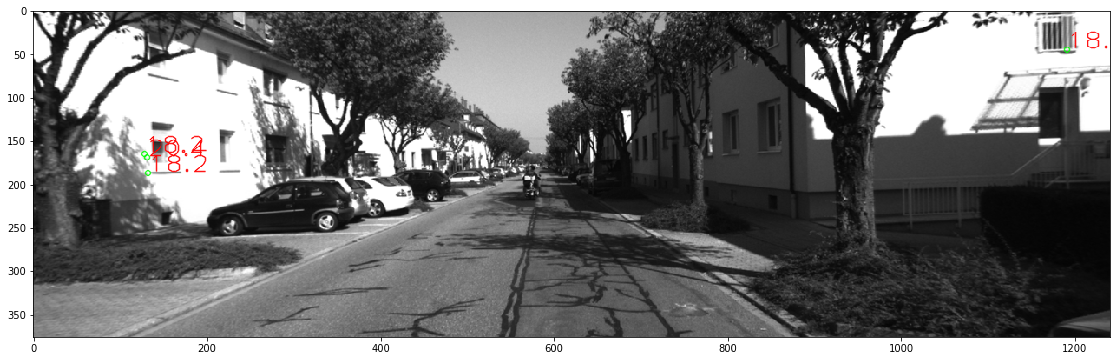

In [62]:
points_per_frame = []
for kf in seq.keyframes:
    kf.update_observations_per_classification()
    kf.filter_no_classification()
    obs = kf.get_observations()
    
    points_per_frame.append(obs)

#print(seq.keyframes[1].frameid, len(seq.keyframes[1].frames))
#print(points_per_frame)
show(draw_observations_depth(points_per_frame[10]))

['Window', 'Cyclist', 'Car', 'Lamppost']
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  2.88800788e-03  -5.97332075e-03   6.95466464e-01   1.00000000e+00]
 [ -7.43867822e-03  -2.61965638e-02   1.41689022e+00   1.00000000e+00]
 [ -2.75565669e-03  -4.66714997e-02   2.14399899e+00   1.00000000e+00]
 [ -4.37862916e-04  -6.69324251e-02   2.90450609e+00   1.00000000e+00]
 [  3.97316658e-02  -1.01640031e-01   3.69499210e+00   1.00000000e+00]
 [  7.80061925e-02  -1.40675266e-01   4.52058116e+00   1.00000000e+00]
 [  4.57184518e-02  -1.48075435e-01   5.31972712e+00   1.00000000e+00]
 [  1.73799981e-01  -3.16326635e-01   6.12777120e+00   1.00000000e+00]
 [  1.54277578e-01  -3.05922100e-01   6.95762843e+00   1.00000000e+00]
 [  1.57668304e-01  -2.89200205e-01   7.81712273e+00   1.00000000e+00]
 [  1.31263722e-01  -3.07506019e-01   8.66941487e+00   1.00000000e+00]
 [  1.28134589e-01  -3.18427726e-01   9.52501078e+00   1.00000000e+00]
 [  1.30193755e-01  -3.31904399e-01 

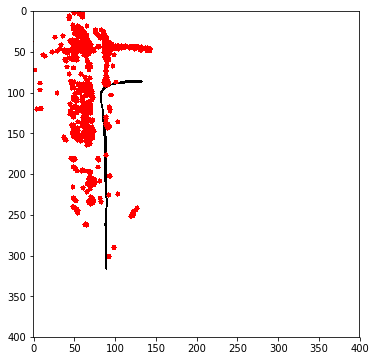

In [64]:
classifications = []
for obs in flatten(points_per_frame):
    if obs.classification not in classifications:
        classifications.append(obs.classification)
        
#print([obs.classification for obs in points_per_frame[9]])
print(classifications)
flatten = lambda l: [item for sublist in l for item in sublist]
flattened = flatten(points_per_frame)
#print(len(flattened))
trajectory = Trajectory(poses, (DIMENSION, DIMENSION), flattened)
show(trajectory.draw(True, False))
#trajectory._observations_rwc